# Players Selling Price Prediction using Multiple Linear Regression

### IPL is one of the most loved cricket championship all around the world. It was started by BCCI in 2007 in India in 20-20 format having Indian as well as International players in the teams. 

According to the dataset given the following teams are - 
1. Bangalore Royal Challengers
2. Chennai Super kings 
3. Deccan Chargers
4. Delhi Daredevils
5. Mumbai Indians
6. Kolkata Knight Riders
7. Rajasthan Royals
8. Kings XI Punjab

Using Dataset we will try to predict the selling price of a player based on their performances in other cricket formats.

#### Steps involved in developing a multiple linear regression model using Python.
1. Importing the libraries
2. Loading the datasets
3. Encoding categorical features
4. Splitting the dataset into train and test validation sets
5. Building the model based on Training Dataset
6. Multi collinearity and Handling Multi - Collinearity 


#### Importing the libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
#### Loading the dataset

In [54]:
ipl = pd.read_csv("C:\\Users\\hp\\IPLIMB381IPL2013.csv")

In [55]:
ipl.head() 

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [56]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [57]:
ipl.isnull().sum()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

No Null values, we can contiue easily
There are 130 observations and 26  columns in the dataset.

Lets built a model to understand what features of players are influencing their sold price or predict the player's auction price in future.
I am creating a variable x_features which will contain the list of features that used for building the model

In [58]:
x_features = ipl.columns

Most of the  features in the dataset are numerical whereas such as age, country, captaincy-exp, playing-role and these will be encoded for building the model.

In [59]:
x_features = ['AGE','COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

Categorical values cannot be directly included in the regression model and they must be encoded using dummy variables before model building.

#### Encoding categorical features


In [60]:
ipl['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [61]:
pd.get_dummies(ipl['PLAYING ROLE'])

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
125,0,1,0,0
126,0,1,0,0
127,0,1,0,0
128,0,0,1,0


I have created dummy variables for all categorical variables present in dataset.

In [62]:
cate_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']
ipl_encoded = pd.get_dummies(ipl[x_features],columns=cate_features, drop_first = True)
ipl_encoded.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

The dataset contains the new dummy variables that have been created and we can reassign the new features to the variable x_features. 

In [63]:
x_features = ipl_encoded.columns

#### Splitting the dataset into train and test validation sets

Before building the model, we will split the datasets into 80-20 ratios and random state value is 42.

In [64]:
from statsmodels import api as sm
from sklearn.model_selection import train_test_split

In [65]:
x = sm.add_constant(ipl_encoded)
y = ipl['SOLD PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.8, random_state = 42)

Using another random value may give different training and test data hence different results.

#### Building the model based on Training Dataset

I will build the Multiple Linear Regression (MLR) model using the training dataset and analyze the model summary.The summary provides details of the model accuracy, feature significance and signs of multi colliearity effect.

In [66]:
ipl_model = sm.OLS(y_train,x_train).fit()
ipl_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by ze

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SOLD PRICE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                nan
Time:                        14:22:18   Log-Likelihood:                 312.53
No. Observations:                  26   AIC:                            -573.1
Df Residuals:                       0   BIC:                            -540.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   8.899e+05        inf          0        nan         nan         nan
T-RUNS                    -8.4505        inf         -0        nan         nan         nan
T-WKTS                  -789.8825        inf         -0        nan         nan         nan
ODI-RUNS-S               -18.5443        inf         -0        nan         nan         nan
ODI-SR-B               -3968.0917        inf         -0        nan         nan         nan
ODI-WKTS                1106.1315        inf          0        nan         nan         nan
ODI-SR-BL                  -1e+04        inf         -0        nan         nan         nan
RUNS-S                  -119.7123        inf         -0        nan         nan         nan
HS                     -7054.0690        inf         -0        nan         nan         nan
AVE                     3.024e+04        inf          0        nan         nan         nan
SR-B                   -3917.3870        inf         -0        nan         nan         nan
SIXERS                  1.209e+04        inf          0        nan         nan         nan
RUNS-C                  -108.3615        inf         -0        nan         nan         nan
WKTS                    1.314e+04        inf          0        nan         nan         nan
AVE-BL                  1.213e+04        inf          0        nan         nan         nan
ECON                   -5.241e+04        inf         -0        nan         nan         nan
SR-BL                  -1.305e+04        inf         -0        nan         nan         nan
AGE_2                   4.375e+05        inf          0        nan         nan         nan
AGE_3                   4.524e+05        inf          0        nan         nan         nan
COUNTRY_BAN             4.579e+04        inf          0        nan         nan         nan
COUNTRY_ENG             3.354e+05        inf          0        nan         nan         nan
COUNTRY_IND            -2.708e+05        inf         -0        nan         nan         nan
COUNTRY_NZ             -1.312e+05        inf         -0        nan         nan         nan
COUNTRY_PAK             -1.38e+05        inf         -0        nan         nan         nan
COUNTRY_SA             -1.816e+05        inf         -0        nan         nan         nan
COUNTRY_SL              7.817e+04        inf          0        nan         nan         nan
COUNTRY_WI              1766.1377        inf          0        nan         nan         nan
COUNTRY_ZIM            -4.683e+05        inf         -0        nan         nan         nan
PLAYING ROLE_Batsman   -2.412e+05        inf         -0        nan         nan         nan
PLAYING ROLE_Bowler    -7.708e+04        inf         -0        nan         nan         nan
PLAYING ROLE_W. Keeper -3.186e+05        inf         -0        nan         nan  

In the MLR as the p value (<0.05) only the features HS, AGE_2, AVE and Country_ENG have come out significant. The model says that none of the other features is influencing sold price.

#### Multi collinearity and Handling Multi - Collinearity
The existence of a high correlation between independent variables is called multi-collinearity.
The presence of multicollinearity can destabilize the multiple linear regression model. It is necessary to identify the presence of multi-collinearity and take corrective actions.

##### 1. Variance Inflation Factor(VIP)
variance_inflation_factore() method available in statsmodels.stats.outliers_influence package can be used to calculate VIF for the features.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(x):
    x_matrix=x.to_numpy()
    vif=[variance_inflation_factor(x_matrix,i) for i in range (x_matrix.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['column']=x.columns
    vif_factors['VIF']=vif
    return vif_factors

In [68]:
vif_factors=get_vif_factors(x[x_features])
vif_factors



,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


#####  Checking correlation of columns with large VIFs

I am making a correlation heatmap to understand the correaltion between the independent variables whcih will be used to decide which features to be included in the model. I am selecting features with vIF value more than 4

In [69]:
columns_vif=vif_factors[vif_factors.VIF>4].column

In [70]:
columns_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

Text(0.5, 1, 'heatmap depicting corr between features')

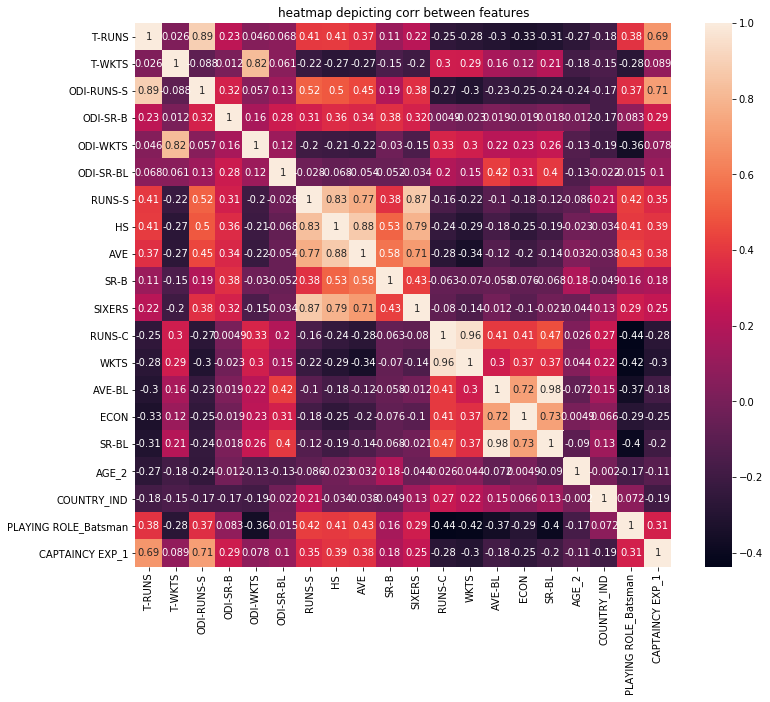

In [71]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sn.heatmap(x[columns_vif].corr(), annot = True)
plt.title("heatmap depicting corr between features")

To avoid multicollinearity, I will keep only one column from each group of highly correlated variables and remove the others. We have decided to remove the following features.

In [87]:
columns_removed = ['T-RUNS','T-WKTS','RUNS-S', 'HS', 'AVE','RUNS-C','SR-B','AVE-BL',
                            'ECON', 'ODI-SR-B','ODI-RUNS-S','SR-BL', 'AGE_2']
x_new_features = list(set(x_features) - set(columns_removed))
x_new_features

['COUNTRY_SA',
 'COUNTRY_WI',
 'SIXERS',
 'ODI-SR-BL',
 'PLAYING ROLE_W. Keeper',
 'COUNTRY_IND',
 'COUNTRY_SL',
 'AGE_3',
 'COUNTRY_ENG',
 'ODI-WKTS',
 'COUNTRY_BAN',
 'COUNTRY_PAK',
 'COUNTRY_ZIM',
 'PLAYING ROLE_Bowler',
 'WKTS',
 'COUNTRY_NZ',
 'PLAYING ROLE_Batsman',
 'CAPTAINCY EXP_1']

In [88]:
get_vif_factors(x[x_new_features])

,column,VIF
0,COUNTRY_SA,1.416657
1,COUNTRY_WI,1.194093
2,SIXERS,2.397409
3,ODI-SR-BL,2.822148
4,PLAYING ROLE_W. Keeper,1.900941
5,COUNTRY_IND,3.144668
6,COUNTRY_SL,1.519752
7,AGE_3,1.779861
8,COUNTRY_ENG,1.131869
9,ODI-WKTS,2.742889


The VIFs on the final set of variables indicate that there is no multicollinearity present anymore. Now we can proceed to build the model with this set of variables now.

#### Build a new model after Removing Multi-collinearity

In [91]:
significant_vars=['COUNTRY_ENG','COUNTRY_IND','SIXERS','CAPTAINCY EXP_1']
x_train=x_train[significant_vars]
ipl_model_3=sm.OLS(y_train,x_train).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.842     
Dependent Variable:     SOLD PRICE       AIC:                         711.3341  
Date:                   2021-08-04 14:27 BIC:                         716.3665  
No. Observations:       26               Log-Likelihood:              -351.67   
Df Model:               4                F-statistic:                 35.64     
Df Residuals:           22               Prob (F-statistic):          2.57e-09  
R-squared (uncentered): 0.866            Scale:                       3.8754e+10
--------------------------------------------------------------------------------
                    Coef.       Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_ENG      1233485.8930 213032.2715 5.7901 0.0000 791684.0026 1675287.7833
COUNTRY_IND       275288.0064  77907.5371 3.5335 0.0019 113717.6634  436858.3494
SIXERS              6535.3772   1799.5869 3.6316 0.0015   2803.2624   10267.4920
CAPTAINCY EXP_1   303443.3526  81806.4508 3.7093 0.0012 133787.1576  473099.5477
--------------------------------------------------------------------------------
Omnibus:                    0.430             Durbin-Watson:               2.131
Prob(Omnibus):              0.807             Jarque-Bera (JB):            0.363
Skew:                       -0.257            Prob(JB):                    0.834
Kurtosis:                   2.736             Condition No.:               143  
================================================================================

"""

##### Based on the p- values, only the variables Country_IND, Country_ENG, SIXERS, CAPTAINCY EXP_1 have come out statically significant. So, the features that decide the cold price are

1. Players belong to India or the origin country of the player
2. How many sixes has the player hit in the previous of the IPL?
3. How many wickets have been taken by the player in ODI?
4. Player has any previous captaincy experience or not?

## THANK YOU!!!